In [46]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.metrics.pairwise import cosine_similarity

In [47]:
#Read csv into pandas Dataframe
coffee_original_df = pd.read_csv("Resources/coffee.csv")

In [48]:
coffee_original_df.head()

,all_text,name,rating,roaster,slug,region_africa_arabia,region_caribbean,region_central_america,region_hawaii,region_asia_pacific,...,aroma,acid,body,flavor,aftertaste,with_milk,desc_1,desc_2,desc_3,desc_4
0,\n\n\n\n \n93\nFlight Coffee Co.\nEthiopia Der...,Ethiopia Deri Kochoha,93,Flight Coffee Co.,/review/ethiopia-deri-kochoha-2,1,0,0,0,0,...,9.0,8.0,9.0,9.0,8.0,NaN,"Bright, crisp, sweetly tart. Citrus medley, ca...",From the Deri Kochoha mill in the Hagere Marya...,A poised and melodic wet-processed Ethiopia co...,NaN
1,\n\n\n\n\n91\nDoi Chaang Coffee\nEspresso\nLoc...,Espresso,91,Doi Chaang Coffee,/review/espresso-14,0,0,0,0,1,...,8.0,NaN,8.0,8.0,8.0,9.0,"Evaluated as espresso. Deeply rich, sweetly ro...",Doi Chaang is a single-estate coffee produced ...,"A rich, resonant espresso from Thailand, espec...",NaN
2,\n\n\n\n \n95\nTemple Coffee and Tea\nKenya Ru...,Kenya Ruthaka Peaberry,95,Temple Coffee and Tea,/review/kenya-ruthaka-peaberry,1,0,0,0,0,...,9.0,8.0,9.0,10.0,8.0,NaN,"Deeply sweet, richly savory. Dark chocolate, p...",Despite challenges ranging from contested gove...,"A high-toned, nuanced Kenya cup, classic in it...",NaN
3,\n\n\n\n \n93\nTemple Coffee and Tea\nEthiopia...,Ethiopia Gora Kone Sidamo,93,Temple Coffee and Tea,/review/ethiopia-gora-kone-sidamo,1,0,0,0,0,...,9.0,8.0,9.0,9.0,8.0,NaN,"Fruit-forward, richly chocolaty. Raspberry cou...",Southern Ethiopia coffees like this one are la...,"A playful, unrestrained fruit bomb of a coffee...",NaN
4,\n\n\n\n\n93\nChoosy Gourmet\nSpecialty Coffee...,Specialty Coffee Blend Espresso,93,Choosy Gourmet,/review/specialty-coffee-blend-espresso,0,0,0,0,0,...,9.0,NaN,8.0,9.0,8.0,9.0,"Evaluated as espresso. Rich, chocolaty, sweetl...",A blend of coffees from Ethiopia (natural-proc...,An espresso blend in which spice notes — in pa...,NaN


In [49]:
espresso_rows = coffee_original_df[coffee_original_df['name'] == 'Espresso']
espresso_rows.head()

,all_text,name,rating,roaster,slug,region_africa_arabia,region_caribbean,region_central_america,region_hawaii,region_asia_pacific,...,aroma,acid,body,flavor,aftertaste,with_milk,desc_1,desc_2,desc_3,desc_4
1,\n\n\n\n\n91\nDoi Chaang Coffee\nEspresso\nLoc...,Espresso,91,Doi Chaang Coffee,/review/espresso-14,0,0,0,0,1,...,8.0,NaN,8.0,8.0,8.0,9.0,"Evaluated as espresso. Deeply rich, sweetly ro...",Doi Chaang is a single-estate coffee produced ...,"A rich, resonant espresso from Thailand, espec...",NaN
2129,\n\n\n\n\n91\nWild Hawk Coffee\nEspresso\nLoca...,Espresso,91,Wild Hawk Coffee,/review/espresso-6,0,0,0,0,0,...,9.0,NaN,9.0,8.0,7.0,8.0,"Evaluated as espresso. Impressive aroma: rich,...",Wild Hawk Coffee is a small-batch coffee roast...,NaN,"A sophisticated darker roasted espresso, with ..."
2804,\n\n\n\n\n89\nCaribou Coffee\nEspresso\nLocati...,Espresso,89,Caribou Coffee,/review/espresso-13,0,0,0,0,0,...,9.0,NaN,7.0,8.0,7.0,8.0,"Evaluated as espresso. Intense, complex aroma:...",This espresso blend is Rainforest Alliance cer...,NaN,Lovers of classic American-style espresso: dar...
2837,\n\n\n\n\n92\nCafe Excellence\nEspresso\nLocat...,Espresso,92,Cafe Excellence,/review/espresso-12,0,0,0,0,0,...,8.0,NaN,8.0,9.0,8.0,9.0,Evaluated as espresso. Deep and sweet-toned in...,Family-owned Café Excellence is a coffee roast...,NaN,Complexity and balance in a fine medium-bodied...
3128,\n\n\n\n\n90\nCoffea Roasters\nEspresso\nLocat...,Espresso,90,Coffea Roasters,/review/espresso-11,0,0,0,0,0,...,8.0,NaN,8.0,9.0,7.0,8.0,"Dark chocolate, aromatic wood and an apricot-l...","Run by the Solares family, Coffea Roasters is ...",NaN,"Best as a straight shot, where its classic bal..."


In [50]:
coffee_original_df.shape

(5124, 34)

In [51]:
coffee_original_df.columns

Index(['all_text', 'name', 'rating', 'roaster', 'slug', 'region_africa_arabia',
       'region_caribbean', 'region_central_america', 'region_hawaii',
       'region_asia_pacific', 'region_south_america', 'type_espresso',
       'type_organic', 'type_fair_trade', 'type_decaffeinated',
       'type_pod_capsule', 'type_blend', 'type_estate', 'location', 'origin',
       'roast', 'est_price', 'review_date', 'agtron', 'aroma', 'acid', 'body',
       'flavor', 'aftertaste', 'with_milk', 'desc_1', 'desc_2', 'desc_3',
       'desc_4'],
      dtype='object')

In [52]:
# Create a dataframe that is only with columns you want 
coffee_original_df = coffee_original_df[['name', 'origin','aroma','acid','body','flavor','aftertaste','desc_1', 'desc_3','desc_4']]
coffee_original_df.head()

,name,origin,aroma,acid,body,flavor,aftertaste,desc_1,desc_3,desc_4
0,Ethiopia Deri Kochoha,"West Guji Zone, Oromia Region, southeastern Et...",9.0,8.0,9.0,9.0,8.0,"Bright, crisp, sweetly tart. Citrus medley, ca...",A poised and melodic wet-processed Ethiopia co...,NaN
1,Espresso,Northern Thailand,8.0,NaN,8.0,8.0,8.0,"Evaluated as espresso. Deeply rich, sweetly ro...","A rich, resonant espresso from Thailand, espec...",NaN
2,Kenya Ruthaka Peaberry,"Nyeri growing region, south-central Kenya",9.0,8.0,9.0,10.0,8.0,"Deeply sweet, richly savory. Dark chocolate, p...","A high-toned, nuanced Kenya cup, classic in it...",NaN
3,Ethiopia Gora Kone Sidamo,"Sidamo (also Sidama) growing region, south-cen...",9.0,8.0,9.0,9.0,8.0,"Fruit-forward, richly chocolaty. Raspberry cou...","A playful, unrestrained fruit bomb of a coffee...",NaN
4,Specialty Coffee Blend Espresso,"Ethiopia, Colombia, Kenya",9.0,NaN,8.0,9.0,8.0,"Evaluated as espresso. Rich, chocolaty, sweetl...",An espresso blend in which spice notes — in pa...,NaN


In [53]:
coffee_original_df.shape

(5124, 10)

In [54]:
# coffee_original_df= coffee_original_df.dropna()
# Fill missing values in 'text' column with the concatenation of 'desc_1', 'desc_3', and 'desc_4'
coffee_original_df['text'] = coffee_original_df[['desc_1', 'desc_3', 'desc_4']].fillna("").astype(str).agg(' '.join, axis=1)
coffee_original_df['text'].head()

0    Bright, crisp, sweetly tart. Citrus medley, ca...
1    Evaluated as espresso. Deeply rich, sweetly ro...
2    Deeply sweet, richly savory. Dark chocolate, p...
3    Fruit-forward, richly chocolaty. Raspberry cou...
4    Evaluated as espresso. Rich, chocolaty, sweetl...
Name: text, dtype: object

In [55]:
coffee_original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5124 entries, 0 to 5123
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        5124 non-null   object 
 1   origin      4529 non-null   object 
 2   aroma       5085 non-null   float64
 3   acid        4256 non-null   float64
 4   body        5111 non-null   float64
 5   flavor      5106 non-null   float64
 6   aftertaste  4111 non-null   float64
 7   desc_1      5124 non-null   object 
 8   desc_3      971 non-null    object 
 9   desc_4      4153 non-null   object 
 10  text        5124 non-null   object 
dtypes: float64(5), object(6)
memory usage: 440.5+ KB


In [56]:
coffee_original_df.head()

,name,origin,aroma,acid,body,flavor,aftertaste,desc_1,desc_3,desc_4,text
0,Ethiopia Deri Kochoha,"West Guji Zone, Oromia Region, southeastern Et...",9.0,8.0,9.0,9.0,8.0,"Bright, crisp, sweetly tart. Citrus medley, ca...",A poised and melodic wet-processed Ethiopia co...,NaN,"Bright, crisp, sweetly tart. Citrus medley, ca..."
1,Espresso,Northern Thailand,8.0,NaN,8.0,8.0,8.0,"Evaluated as espresso. Deeply rich, sweetly ro...","A rich, resonant espresso from Thailand, espec...",NaN,"Evaluated as espresso. Deeply rich, sweetly ro..."
2,Kenya Ruthaka Peaberry,"Nyeri growing region, south-central Kenya",9.0,8.0,9.0,10.0,8.0,"Deeply sweet, richly savory. Dark chocolate, p...","A high-toned, nuanced Kenya cup, classic in it...",NaN,"Deeply sweet, richly savory. Dark chocolate, p..."
3,Ethiopia Gora Kone Sidamo,"Sidamo (also Sidama) growing region, south-cen...",9.0,8.0,9.0,9.0,8.0,"Fruit-forward, richly chocolaty. Raspberry cou...","A playful, unrestrained fruit bomb of a coffee...",NaN,"Fruit-forward, richly chocolaty. Raspberry cou..."
4,Specialty Coffee Blend Espresso,"Ethiopia, Colombia, Kenya",9.0,NaN,8.0,9.0,8.0,"Evaluated as espresso. Rich, chocolaty, sweetl...",An espresso blend in which spice notes — in pa...,NaN,"Evaluated as espresso. Rich, chocolaty, sweetl..."


In [57]:
coffee_original_df.shape

(5124, 11)

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=3, max_features=None,
                      strip_accents ='unicode', analyzer='word', token_pattern= r'\w{1,}', 
                      ngram_range = (1,3), 
                      stop_words = 'english')

In [59]:
tfv_matrix = tfv.fit_transform(coffee_original_df['text'])

In [60]:
tfv_matrix

<5124x21865 sparse matrix of type '<class 'numpy.float64'>'
	with 364788 stored elements in Compressed Sparse Row format>

In [61]:
# review records and features
tfv_matrix.shape

(5124, 21865)

In [62]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel 
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [63]:
# sig[0]

In [64]:
# Create label encoder for name  
from sklearn.preprocessing import LabelEncoder

le_name = LabelEncoder()
coffee_original_df['name'] = le_name.fit_transform(coffee_original_df['name'])
print(coffee_original_df['name'].unique()) 

[1321 1201 2600 ... 3575  178 3520]


In [65]:
# Allow for indices for each name 
indices = pd.Series(coffee_original_df.index, index=coffee_original_df['slug'].str.strip()).drop_duplicates()


KeyError: 'slug'

In [ ]:
indices

In [ ]:
indices['/review/special-roast']

In [ ]:
def coffee_recommended(aroma, body, flavor, acid, aftertaste, sig, indices):
  
    # Create a DataFrame with user input
    user_input = pd.DataFrame({'aroma': [aroma], 'body': [body], 'flavor': [flavor],
                               'acid': [acid], 'aftertaste': [aftertaste]})

    # Use the TfidfVectorizer to transform user input into a feature vector
    user_vector = tfv.transform(user_input.astype(str).agg(' '.join, axis=1))

    # Calculate similarity scores between user input and all coffees
    sig_scores = cosine_similarity(user_vector, sig).flatten()

    # Get indices of similar coffees
    sig_scores_with_index = list(enumerate(sig_scores))
    sig_scores_with_index = sorted(sig_scores_with_index, key=lambda x: x[1], reverse=True)
    similar_indices = [i[0] for i in sig_scores_with_index]

    # Return top 5 similar coffees
    return coffee_original_df['name'].iloc[similar_indices]


In [ ]:
# Identify unique values
# ------------------------------------------------

# Create an empty dictionary to store unique values for each column
unique_values = {}

# Loop through the columns and find unique values
for column in coffee_original_df.columns:
    unique_values[column] = coffee_original_df[column].unique()

# Display unique values for each column
for column, values in unique_values.items():
    print(f'Column: {column}')
    print(values)
    print('\n')

Column: name
['Ethiopia Deri Kochoha' 'Kenya Ruthaka Peaberry'
 'Ethiopia Gora Kone Sidamo' ... 'Rwanda Gorilla Blend'
 'Cafe Quindio Gourmet Colombian' 'La Mattina Sumatra']


Column: origin
['West Guji Zone, Oromia Region, southeastern Ethiopia'
 'Nyeri growing region, south-central Kenya'
 'Sidamo (also Sidama) growing region, south-central Ethiopia' ...
 'Rwanda, Central Africa'
 'Armenia growing region, Quindio Department, Colombia'
 'Northern provinces of Sumatra, Indonesia']


Column: aroma
[ 9. 10.  8.  7.  6.  3.  2.  4.  5.]


Column: acid
[ 8.  9.  7.  6.  4.  3.  2.  5. 10.]


Column: body
[ 9.  8. 10.  7.  6.  5.]


Column: flavor
[ 9. 10.  8.  7.  6.  3.  2.  1.  4.  5.]


Column: aftertaste
[ 8.  9.  7.  6.  4.  3.  2.  5. 10.]




In [ ]:
coffee_original_df.head()

,name,origin,aroma,acid,body,flavor,aftertaste
0,Ethiopia Deri Kochoha,"West Guji Zone, Oromia Region, southeastern Et...",9.0,8.0,9.0,9.0,8.0
2,Kenya Ruthaka Peaberry,"Nyeri growing region, south-central Kenya",9.0,8.0,9.0,10.0,8.0
3,Ethiopia Gora Kone Sidamo,"Sidamo (also Sidama) growing region, south-cen...",9.0,8.0,9.0,9.0,8.0
5,Honduras Las Flores Parainema,"Santa Bárbara, Honduras",9.0,8.0,9.0,9.0,8.0
6,Kivu DR Congo,"Kalehe, South Kivu Province, Democratic Republ...",9.0,8.0,9.0,9.0,8.0


In [ ]:
# Confirm there is no null data 
coffee_original_df.isnull().sum()

name          0
origin        0
aroma         0
acid          0
body          0
flavor        0
aftertaste    0
dtype: int64

In [ ]:
coffee_original_df['origin'].value_counts()

origin
Not disclosed.                                                       152
Boquete growing region, western Panama                               101
Yirgacheffe growing region, southern Ethiopia.                       100
Yirgacheffe growing region, southern Ethiopia                         78
South-central Kenya.                                                  60
                                                                    ... 
Captain Cook, North Kona growing district, “Big Island” of Hawaii      1
Puna District, "Big Island" of Hawaii.                                 1
Waialua, Oahu, Hawaii.                                                 1
Ka'anapali, Maui, Hawaii.                                              1
West Guji Zone, Oromia Region, southeastern Ethiopia                   1
Name: count, Length: 1094, dtype: int64

In [ ]:
def shorten_categories(categories, cutoff): 
    categorical_map = {} 
    for i in range(len(categories)): 
        if categories.values[i]>= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map 

In [ ]:
origin_map = shorten_categories(coffee_original_df.origin.value_counts(),10)
coffee_original_df['origin']= coffee_original_df['origin'].map(origin_map)
coffee_original_df.origin.value_counts()

origin
Other                                                                        1970
Not disclosed.                                                                152
Boquete growing region, western Panama                                        101
Yirgacheffe growing region, southern Ethiopia.                                100
Yirgacheffe growing region, southern Ethiopia                                  78
South-central Kenya.                                                           60
Colombia                                                                       53
Nyeri growing region, south-central Kenya                                      52
South-central Kenya                                                            45
Huehuetenango growing region, Guatemala.                                       41
Northern Sumatra, Indonesia                                                    39
Yirgacheffe growing region, Sidamo Province, southern Ethiopia.                38
Nyeri gro

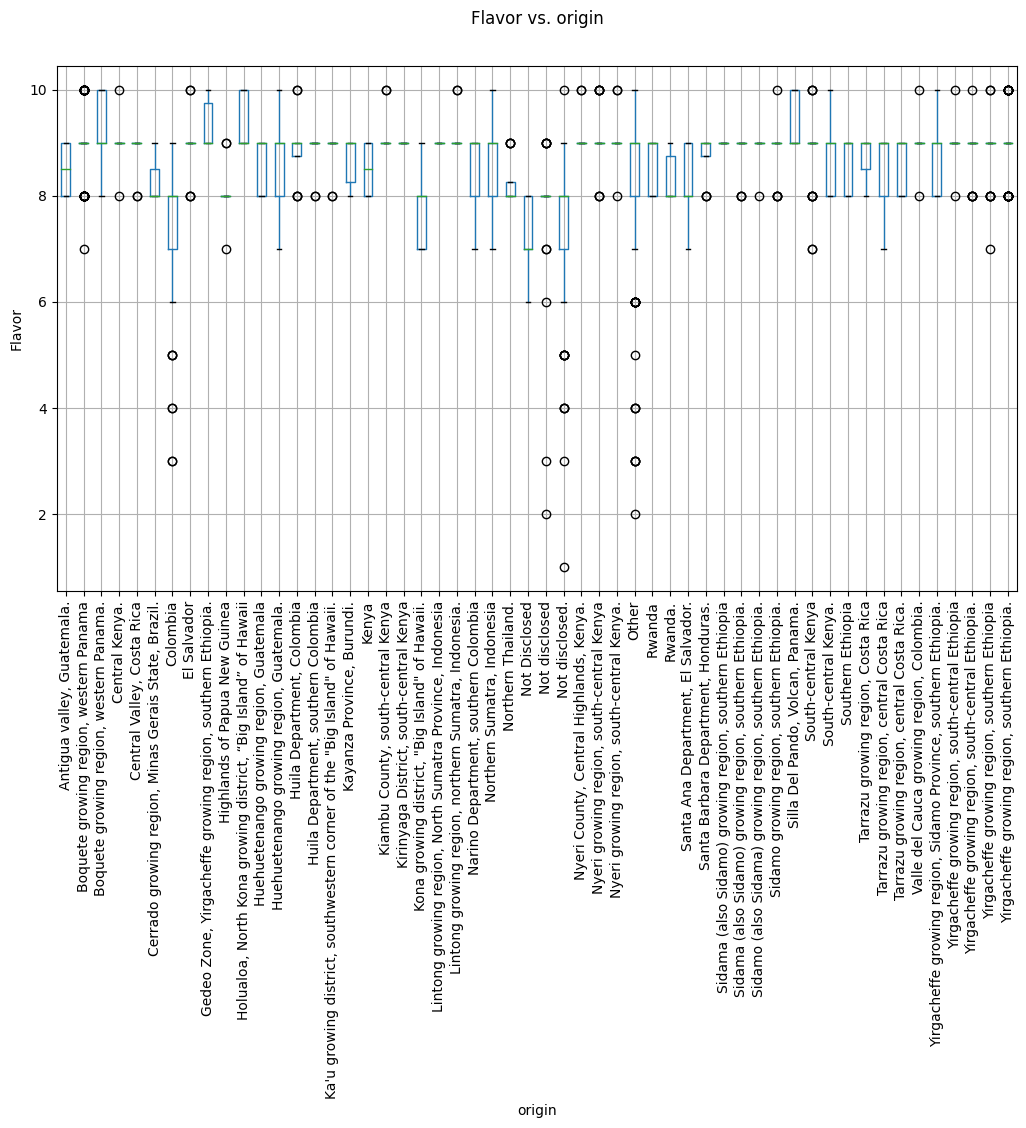

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12,7))
coffee_original_df.boxplot('flavor','origin', ax=ax)
plt.suptitle('Flavor vs. origin')
plt.title('')
plt.ylabel('Flavor')
plt.xticks(rotation=90)
plt.show()

In [ ]:
coffee_original_df.head(1)

,name,origin,aroma,acid,body,flavor,aftertaste
0,Ethiopia Deri Kochoha,Other,9.0,8.0,9.0,9.0,8.0


In [ ]:
# # Create label encoder for origin 
# le_origin = LabelEncoder()
# coffee_original_df['origin'] = le_origin.fit_transform(coffee_original_df['origin'])
# print(coffee_original_df['origin'].unique()) 

i

In [ ]:
# X = coffee_original_df[['name', 'origin']]
# y = coffee_original_df[['acid','body','flavor','aftertaste']]

In [ ]:
# from sklearn.linear_model import LinearRegression 
# linear_reg = LinearRegression()
# linear_reg.fit(X,y.values)

In [ ]:
# # Get predictions 
# y_pred = linear_reg.predict(X)

In [ ]:
# # find the margin of error with the linear regression model based of actual layer vs. predicted label 
# from sklearn.metrics import mean_squared_error, mean_absolute_error 
# import numpy as np 
# lr_error = np.sqrt(mean_squared_error(y,y_pred))

In [ ]:
# # Print error 
# print(f" Linear Regression Error: {lr_error}")

In [ ]:
# from sklearn.tree import DecisionTreeRegressor
# dec_tree_reg  = DecisionTreeRegressor(random_state=0)
# dec_tree_reg.fit(X,y.values)

In [ ]:
# # Predict the values 
# y_pred = dec_tree_reg.predict(X)

In [ ]:
# dt_error = np.sqrt(mean_squared_error(y,y_pred))

In [ ]:
# print(f" Decision Tree Error: {dt_error}")

In [ ]:
# # Try the random forest regressor 
# from sklearn.ensemble import RandomForestRegressor 
# random_forest_reg = RandomForestRegressor(random_state=0)
# random_forest_reg.fit(X,y.values)

In [ ]:
# # Create a prediction 
# y_pred = random_forest_reg.predict(X)

In [ ]:
# # Calculate error for random forest regression  
# rf_error = np.sqrt(mean_squared_error(y,y_pred))

In [ ]:
# # Print all values of error. 
# print(f" Linear Regression Error: {lr_error}")
# print(f" Decision Tree Error: {dt_error}")
# print(f" Random Forest Error: {rf_error}")

In [ ]:
# # consider different parameters . Find model with best parameters 
# from sklearn.model_selection import GridSearchCV 

# max_depth = [None, 2,4,6,8,10,12] 
# parameters = {'max_depth': max_depth} # same name as decision tree regressor 

# regressor = DecisionTreeRegressor(random_state=0)
# gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
# gs.fit(X,y.values)

In [ ]:
# regressor = gs.best_estimator_

# regressor.fit(X,y.values)
# y_pred = regressor.predict(X)
# best_fit_error = np.sqrt(mean_squared_error(y,y_pred))
# print(f" Best fit Error: {best_fit_error}")

In [ ]:
# # Review Dataframe 
# X

In [ ]:
# # Create a numpy array for the X values
# X = np.array([['Kenya Ruthaka Peaberry', 'Nyeri growing region, south-central Kenya']])
# X

In [ ]:
# # Train the model to encode labeler where user input 
# X[:,0]= le_name.transform(X[:,0])
# X[:,1]= le_origin.transform(X[:,1])
# X= X.astype(float)
# X

In [ ]:
# y_pred = regressor.predict(X)
# y_pred

In [ ]:
# import pickle

In [ ]:
# # Create a data instance for the machine learning data 
# data = {"model": regressor, "le_name" : le_name, "le_origin": le_origin}
# with open('saved_steps.pkl','wb') as file: 
#     pickle.dump(data,file)

In [ ]:
# # Check and create variables for the machine learning 
# with open('saved_steps.pkl','rb') as file: 
#     data = pickle.load(file)
    
# regressor_loaded = data['model']
# le_name = data['le_name']
# le_origin = data['le_origin']

In [ ]:
# # Confirm prediction with model saved
# y_pred = regressor_loaded.predict(X)
# y_pred

In [ ]:
# data

In [ ]:
coffee_original_df.to_csv('Resources/coffee_final_try.csv', index=False) 